In [2]:
import pandas as pd
#import pandas_profiling

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip --ignore-installed phik

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data = pd.read_csv('MergedData_Final.csv')

In [3]:
data.columns

Index(['DentalOnlyPlan_x', 'StandardComponentId', 'NetworkId', 'ServiceAreaId', 'IsNewPlan', 'PlanType', 'MetalLevel', 'DesignType', 'UniquePlanDesign', 'QHPNonQHPTypeId', 'IsNoticeRequiredForPregnancy', 'IsReferralRequiredForSpecialist', 'CompositeRatingOffered', 'ChildOnlyOffering', 'WellnessProgramOffered', 'EHBPercentTotalPremium', 'EHBPediatricDentalApportionmentQuantity', 'IsGuaranteedRate', 'OutOfCountryCoverage', 'OutOfServiceAreaCoverage', 'NationalNetwork', 'PlanId', 'CSRVariationType', 'IssuerActuarialValue', 'AVCalculatorOutputNumber', 'MedicalDrugDeductiblesIntegrated', 'MedicalDrugMaximumOutofPocketIntegrated', 'MultipleInNetworkTiers', 'FirstTierUtilization', 'SecondTierUtilization', 'IsHSAEligible', 'BusinessYear_x', 'StateCode_x', 'Tobacco', 'age_cat', 'IndividualRate', 'BusinessYear_y', 'StateCode_y', 'EnrolleeContractRateDeterminationRule', 'TwoParentFamilyMaxDependentsRule', 'SingleParentFamilyMaxDependentsRule', 'DependentMaximumAgRule',
       'ChildrenOnlyContrac

In [4]:
data.drop(columns=['BusinessYear_y', 'StateCode_y','DentalOnlyPlan_y'], inplace=True)

In [7]:
data.columns

Index(['DentalOnlyPlan_x', 'StandardComponentId', 'NetworkId', 'ServiceAreaId', 'IsNewPlan', 'PlanType', 'MetalLevel', 'DesignType', 'UniquePlanDesign', 'QHPNonQHPTypeId', 'IsNoticeRequiredForPregnancy', 'IsReferralRequiredForSpecialist', 'CompositeRatingOffered', 'ChildOnlyOffering', 'WellnessProgramOffered', 'EHBPercentTotalPremium', 'EHBPediatricDentalApportionmentQuantity', 'IsGuaranteedRate', 'OutOfCountryCoverage', 'OutOfServiceAreaCoverage', 'NationalNetwork', 'PlanId', 'CSRVariationType', 'IssuerActuarialValue', 'AVCalculatorOutputNumber', 'MedicalDrugDeductiblesIntegrated', 'MedicalDrugMaximumOutofPocketIntegrated', 'MultipleInNetworkTiers', 'FirstTierUtilization', 'SecondTierUtilization', 'IsHSAEligible', 'BusinessYear_x', 'StateCode_x', 'Tobacco', 'age_cat', 'IndividualRate', 'EnrolleeContractRateDeterminationRule', 'TwoParentFamilyMaxDependentsRule', 'SingleParentFamilyMaxDependentsRule', 'DependentMaximumAgRule', 'ChildrenOnlyContractMaxChildrenRule',
       'DomesticPartn

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
data.head(2).T

,0,1
DentalOnlyPlan_x,Yes,Yes
StandardComponentId,21989AK0130001,21989AK0030001
NetworkId,AKN001,AKN001
ServiceAreaId,AKS001,AKS001
IsNewPlan,New,Existing
PlanType,Indemnity,Indemnity
MetalLevel,High,Low
DesignType,Not Applicable,Not Applicable
UniquePlanDesign,No,No
QHPNonQHPTypeId,Off the Exchange,Both


In [10]:
conti =data[['IssuerActuarialValue','IndividualRate','AVCalculatorOutputNumber']]

In [11]:
transformed = data.drop(columns=conti).apply(LabelEncoder().fit_transform)

In [12]:
transformed['index'] = transformed.index
conti['index'] = conti.index

/Users/dikshya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
conti.shape

(96009, 4)

In [14]:
processed = pd.merge(transformed,conti, on='index')

In [15]:
processed.columns

Index(['DentalOnlyPlan_x', 'StandardComponentId', 'NetworkId', 'ServiceAreaId', 'IsNewPlan', 'PlanType', 'MetalLevel', 'DesignType', 'UniquePlanDesign', 'QHPNonQHPTypeId', 'IsNoticeRequiredForPregnancy', 'IsReferralRequiredForSpecialist', 'CompositeRatingOffered', 'ChildOnlyOffering', 'WellnessProgramOffered', 'EHBPercentTotalPremium', 'EHBPediatricDentalApportionmentQuantity', 'IsGuaranteedRate', 'OutOfCountryCoverage', 'OutOfServiceAreaCoverage', 'NationalNetwork', 'PlanId', 'CSRVariationType', 'MedicalDrugDeductiblesIntegrated', 'MedicalDrugMaximumOutofPocketIntegrated', 'MultipleInNetworkTiers', 'FirstTierUtilization', 'SecondTierUtilization', 'IsHSAEligible', 'BusinessYear_x', 'StateCode_x', 'Tobacco', 'age_cat', 'EnrolleeContractRateDeterminationRule', 'TwoParentFamilyMaxDependentsRule', 'SingleParentFamilyMaxDependentsRule', 'DependentMaximumAgRule', 'ChildrenOnlyContractMaxChildrenRule', 'DomesticPartnerAsSpouseIndicator', 'SameSexPartnerAsSpouseIndicator',
       'AgeDetermina

In [16]:
processed.head()

,DentalOnlyPlan_x,StandardComponentId,NetworkId,ServiceAreaId,IsNewPlan,PlanType,MetalLevel,DesignType,UniquePlanDesign,QHPNonQHPTypeId,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,CompositeRatingOffered,ChildOnlyOffering,WellnessProgramOffered,EHBPercentTotalPremium,EHBPediatricDentalApportionmentQuantity,IsGuaranteedRate,OutOfCountryCoverage,OutOfServiceAreaCoverage,NationalNetwork,PlanId,CSRVariationType,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MultipleInNetworkTiers,FirstTierUtilization,SecondTierUtilization,IsHSAEligible,BusinessYear_x,StateCode_x,Tobacco,age_cat,EnrolleeContractRateDeterminationRule,TwoParentFamilyMaxDependentsRule,SingleParentFamilyMaxDependentsRule,DependentMaximumAgRule,ChildrenOnlyContractMaxChildrenRule,DomesticPartnerAsSpouseIndicator,SameSexPartnerAsSpouseIndicator,AgeDeterminationRule,MinimumTobaccoFreeMonthsRule,MarketCoverage,index,IssuerActuarialValue,IndividualRate,AVCalculatorOutputNumber
0,1,655,0,0,1,2,4,4,0,1,0,0,0,0,1,0,116,0,1,1,1,2172,10,0,0,0,34,0,0,0,0,0,7,1,1,1,1,1,1,1,1,2,1,0,0.86,68.145,0.0
1,1,641,0,0,0,2,5,4,0,0,0,0,0,0,1,0,116,1,1,1,1,2153,12,0,0,0,34,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,0,1,0.72,53.000,0.0
2,1,641,0,0,0,2,5,4,0,0,0,0,0,0,1,0,116,1,1,1,1,2153,12,0,0,0,34,0,0,0,0,0,1,0,1,1,1,1,1,1,1,2,0,2,0.72,48.000,0.0
3,1,641,0,0,0,2,5,4,0,0,0,0,0,0,1,0,116,1,1,1,1,2153,12,0,0,0,34,0,0,0,0,0,2,0,1,1,1,1,1,1,1,2,0,3,0.72,42.000,0.0
4,1,641,0,0,0,2,5,4,0,0,0,0,0,0,1,0,116,1,1,1,1,2153,12,0,0,0,34,0,0,0,0,0,3,0,1,1,1,1,1,1,1,2,0,4,0.72,42.000,0.0


In [59]:
processed.to_csv('Processed_FinalData.csv',index=False)

### Checkpoint 1

In [2]:
import pandas as pd
processed = pd.read_csv('Processed_FinalData.csv')

In [3]:
processed.shape

(96009, 47)

In [7]:
#processed.columns

In [5]:
#processed1 = processed[['IssuerActuarialValue', 'IndividualRate', 'AVCalculatorOutputNumber','MarketCoverage']]

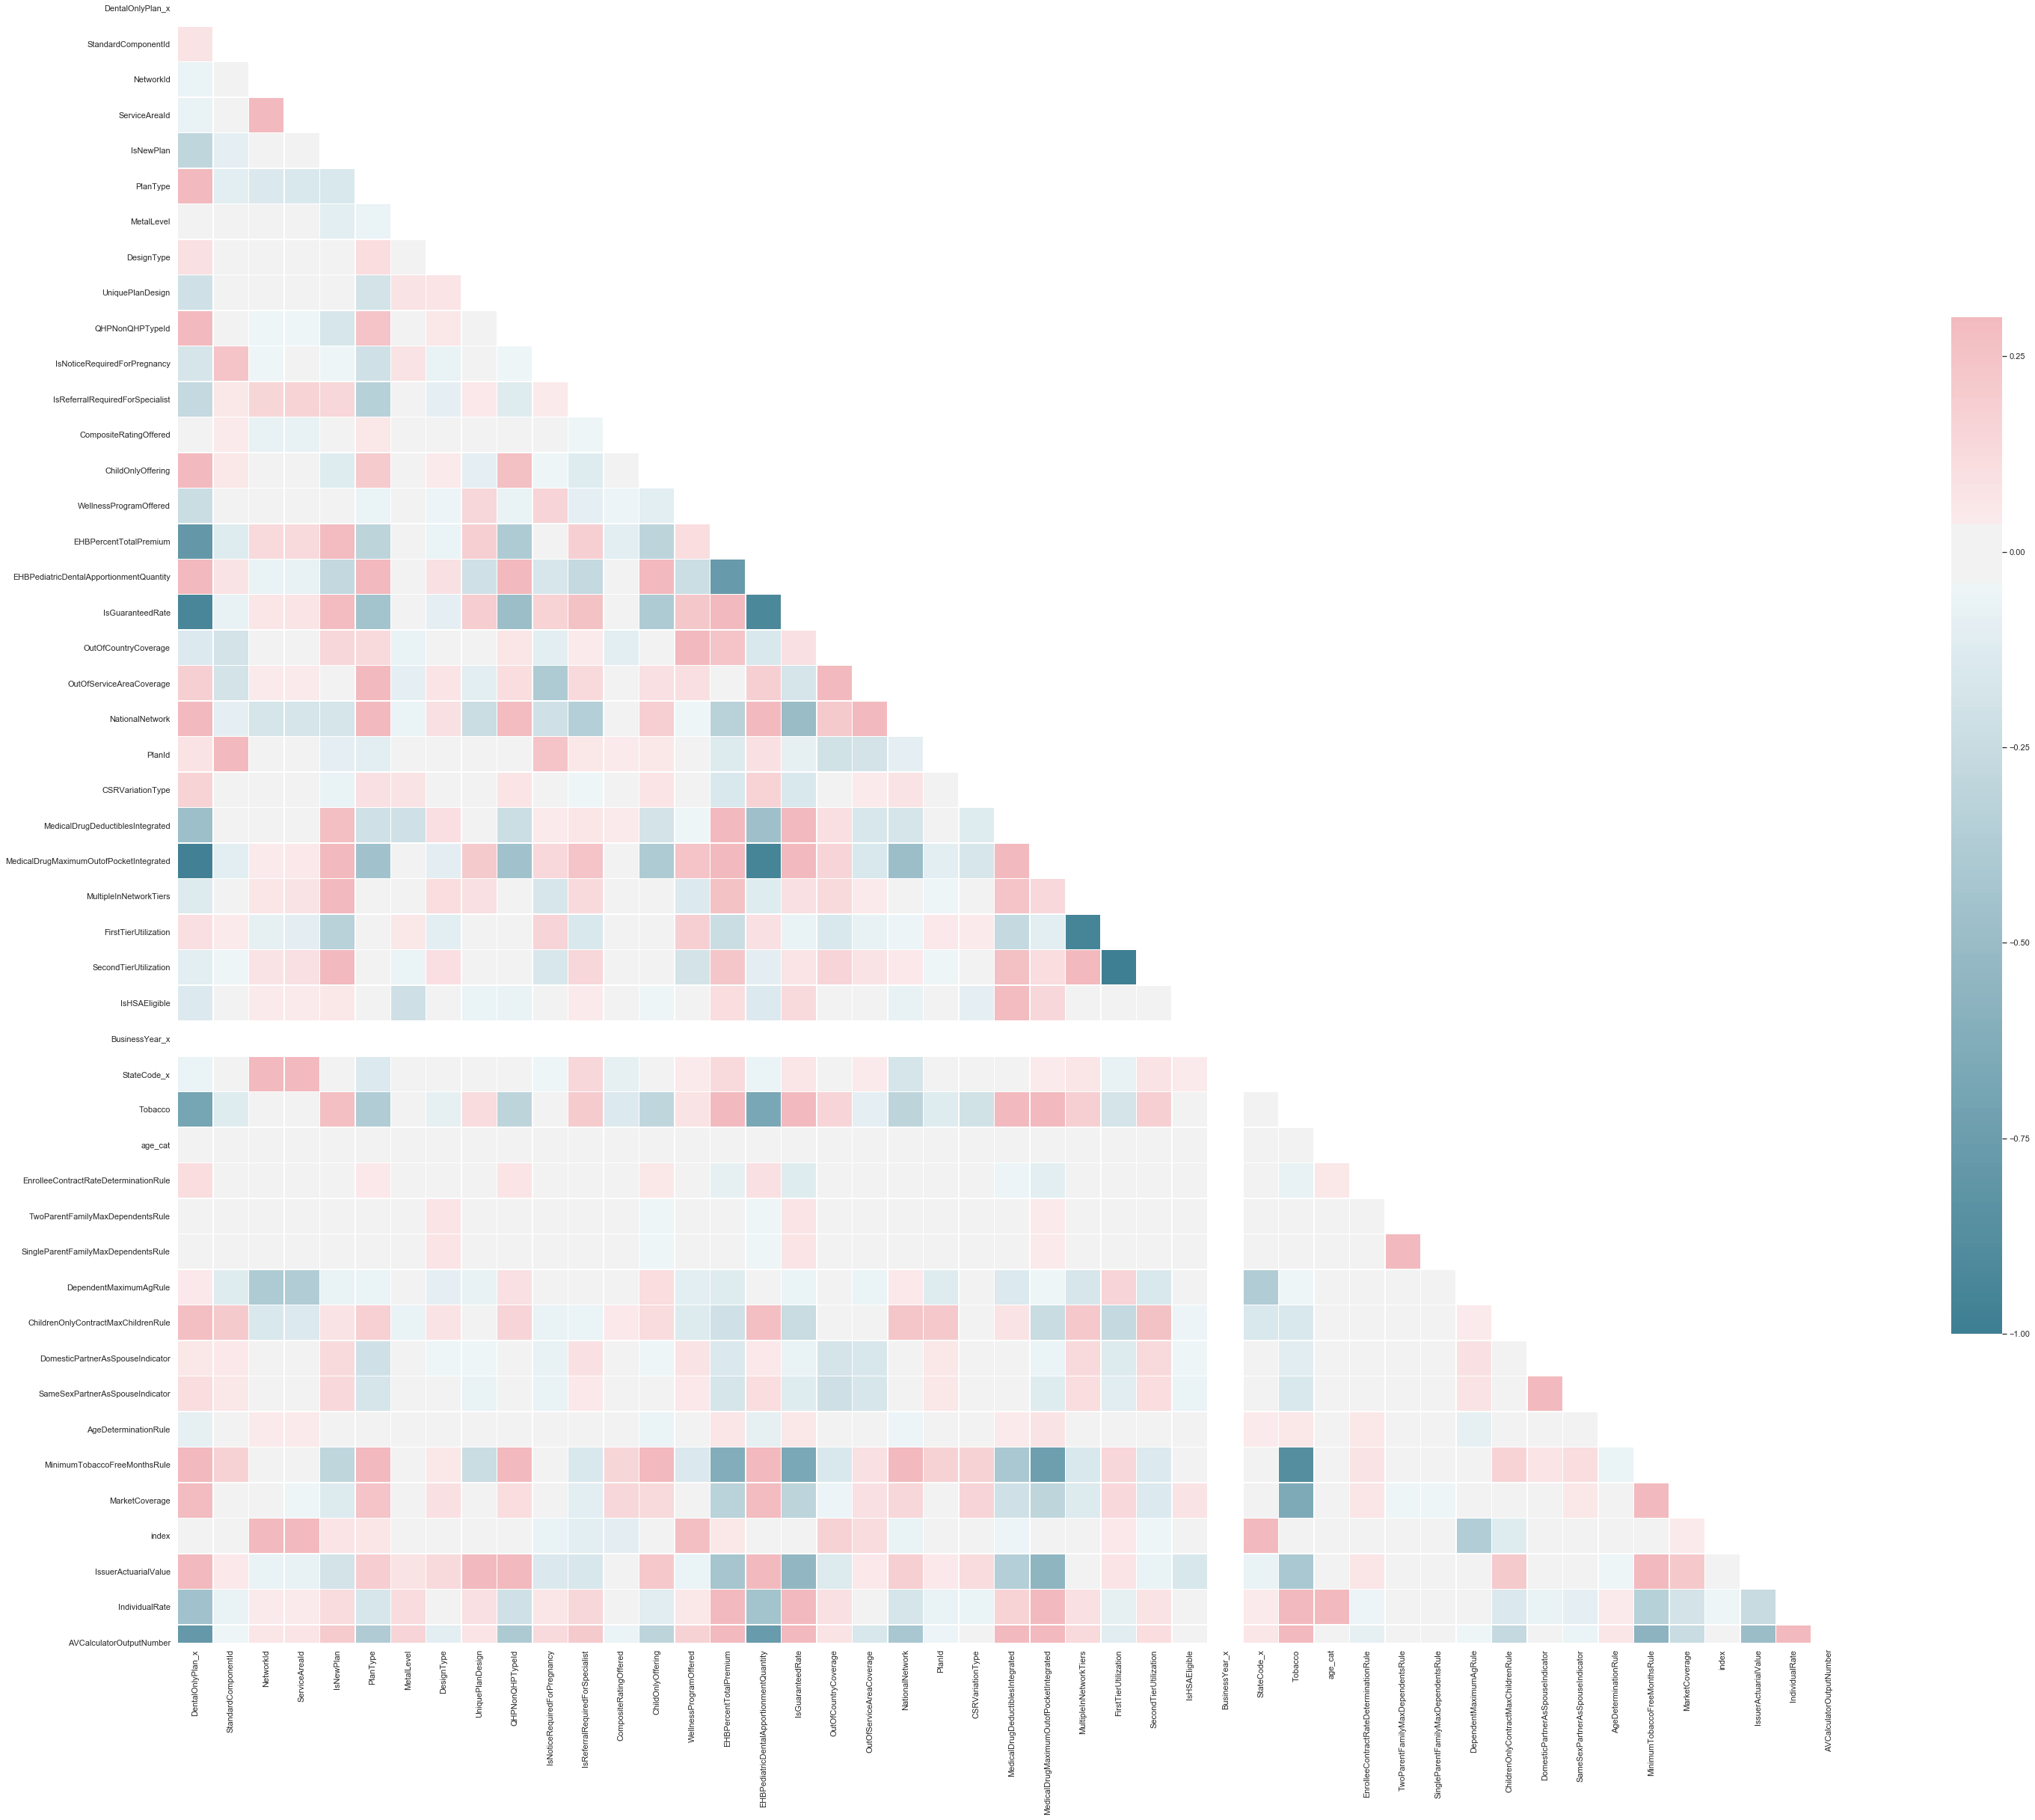

In [8]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
corr = processed.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 50))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
#conda install seaborn

In [8]:
#sns.pairplot(processed)

In [5]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [11]:
del processed['index']

In [12]:
X = processed.drop(columns='IndividualRate')
y = processed[['IndividualRate']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Linear Regression

In [4]:
from statsmodels.api import OLS 
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score

In [21]:
summ=OLS(y_train,X_train).fit()

In [22]:
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         IndividualRate   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     2399.
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:30:42   Log-Likelihood:            -5.4811e+05
No. Observations:               76807   AIC:                         1.096e+06
Df Residuals:                   76764   BIC:                         1.097e+06
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
DentalOnlyPlan_x                         -813.1269     26.318    -30.896      0.000    -864.711    -761.543
StandardComponentId                        -0.0283      0.022     -1.315      0.189      -0.070       0.014
NetworkId                                  -1.0827      0.594     -1.823      0.068      -2.247       0.081
ServiceAreaId                               0.6726      0.176      3.825      0.000       0.328       1.017
IsNewPlan                                   6.5780      2.602      2.528      0.011       1.478      11.678
PlanType                                    8.4012      1.114      7.542      0.000       6.218      10.584
MetalLevel                                 18.0884      0.455     39.745      0.000      17.196      18.980
DesignType                                 17.5862      1.397     12.586      0.000      14.848      20.325
UniquePlanDesign                           31.5688     12.003      2.630      0.009       8.044      55.094
QHPNonQHPTypeId                           -25.4443      3.402     -7.480      0.000     -32.111     -18.777
IsNoticeRequiredForPregnancy               24.4368      3.906      6.257      0.000      16.782      32.092
IsReferralRequiredForSpecialist            24.9607      3.088      8.084      0.000      18.909      31.013
CompositeRatingOffered                    225.0489     12.992     17.322      0.000     199.585     250.513
ChildOnlyOffering                         112.0283      3.606     31.066      0.000     104.960     119.096
WellnessProgramOffered                    -77.4735      3.344    -23.166      0.000     -84.028     -70.919
EHBPercentTotalPremium                      0.0050      0.025      0.198      0.843      -0.044       0.054
EHBPediatricDentalApportionmentQuantity    -0.3199      0.134     -2.395      0.017      -0.582      -0.058
IsGuaranteedRate                         -207.0039      7.545    -27.437      0.000    -221.791    -192.217
OutOfCountryCoverage                        7.8624      3.260      2.412      0.016       1.473      14.251
OutOfServiceAreaCoverage                   40.8543      4.015     10.176      0.000      32.985      48.723
NationalNetwork                            84.1708      3.846     21.886      0.000      76.633      91.709
PlanId                                      0.0066      0.007      0.993      0.321      -0.006       0.019
CSRVariationType                            0.0246      0.183      0.134      0.893      -0.334       0.383
MedicalDrugDeductiblesIntegrated          -63.0676      3.073    -20.521      0.000     -69.091     -57.044
MedicalDrugMaximumOutofPocketIntegrated    18.3686     15.269      1.203      0.229     -11.558      48.295
MultipleInNetworkTiers                     57.9605     10.3

In [23]:
ypred = summ.predict(X_test)
print(ypred)

72429    529.109791
68693    144.029311
2687     612.145418
14224    639.009243
42200    981.871269
            ...    
34063    650.188949
55516    318.578332
94863    512.714172
29183    593.254070
94051   -267.871920
Length: 19202, dtype: float64


In [32]:
print(metrics.mean_absolute_error(y_test, ypred))
print(metrics.mean_squared_error(y_test, ypred))
print(np.sqrt(metrics.mean_squared_error(y_test, ypred)))
print(metrics.r2_score(y_test, ypred))

155.1535339452212
86429.76784743648
293.9894009100268
0.5875426124842607


### Lasso Regression

In [31]:
ols=OLS(y_train,X_train).fit_regularized(alpha=1, refit=True)
ols.summary()

/Users/dikshya/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/dikshya/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/dikshya/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         IndividualRate   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     3278.
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:38:13   Log-Likelihood:            -5.4936e+05
No. Observations:               76807   AIC:                         1.099e+06
Df Residuals:                   76778   BIC:                         1.099e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
DentalOnlyPlan_x                                 0          0        nan        nan           0           0
StandardComponentId                         0.0416      0.021      1.973      0.049       0.000       0.083
NetworkId                                  -0.9734      0.577     -1.686      0.092      -2.105       0.158
ServiceAreaId                               1.1071      0.172      6.432      0.000       0.770       1.445
IsNewPlan                                        0          0        nan        nan           0           0
PlanType                                   10.6406      1.056     10.076      0.000       8.571      12.710
MetalLevel                                 20.2158      0.444     45.519      0.000      19.345      21.086
DesignType                                 17.8326      1.413     12.624      0.000      15.064      20.601
UniquePlanDesign                           29.9658      3.172      9.446      0.000      23.748      36.184
QHPNonQHPTypeId                           -27.9077      3.302     -8.451      0.000     -34.380     -21.435
IsNoticeRequiredForPregnancy                     0          0        nan        nan           0           0
IsReferralRequiredForSpecialist            39.7115      3.063     12.967      0.000      33.709      45.714
CompositeRatingOffered                    205.1824     13.010     15.771      0.000     179.683     230.682
ChildOnlyOffering                         121.7284      3.556     34.228      0.000     114.758     128.699
WellnessProgramOffered                    -61.5736      3.046    -20.217      0.000     -67.543     -55.604
EHBPercentTotalPremium                      0.1502      0.024      6.145      0.000       0.102       0.198
EHBPediatricDentalApportionmentQuantity    -2.7242      0.099    -27.389      0.000      -2.919      -2.529
IsGuaranteedRate                                 0          0        nan        nan           0           0
OutOfCountryCoverage                             0          0        nan        nan           0           0
OutOfServiceAreaCoverage                   14.9405      3.376      4.426      0.000       8.324      21.557
NationalNetwork                            83.9097      3.731     22.493      0.000      76.598      91.221
PlanId                                     -0.0132      0.006     -2.043      0.041      -0.026      -0.001
CSRVariationType                            0.6776      0.181      3.749      0.000       0.323       1.032
MedicalDrugDeductiblesIntegrated          -64.7636      2.969    -21.812      0.000     -70.583     -58.944
MedicalDrugMaximumOutofPocketIntegrated   342.2622     11.503     29.755      0.000     319.717     364.807
MultipleInNetworkTiers                           0         

In [34]:
y_pred = ols.predict(X_test)

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

157.61307635615424
89200.04019289587
298.6637577492386
0.5743224069604855


### Tree Random Forest all variables

In [75]:
#processed_dropped = processed[['IndividualRate','StandardComponentId', 'NetworkId', 'ServiceAreaId', 'PlanType', 'MetalLevel', 'DesignType', 'UniquePlanDesign', 'QHPNonQHPTypeId','IsReferralRequiredForSpecialist', 'CompositeRatingOffered', 'ChildOnlyOffering', 'WellnessProgramOffered', 'EHBPercentTotalPremium', 'EHBPediatricDentalApportionmentQuantity', 'OutOfServiceAreaCoverage', 'NationalNetwork', 'PlanId', 'CSRVariationType', 'MedicalDrugDeductiblesIntegrated', 'MedicalDrugMaximumOutofPocketIntegrated', 'FirstTierUtilization', 'SecondTierUtilization', 'StateCode_x', 'Tobacco', 'age_cat', 'TwoParentFamilyMaxDependentsRule', 'ChildrenOnlyContractMaxChildrenRule', 'MinimumTobaccoFreeMonthsRule', 'MarketCoverage']]

In [76]:
X = processed.drop(columns='IndividualRate')
y = processed[['IndividualRate']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [77]:
rfr = RandomForestRegressor(n_estimators = 250, random_state=0)               #RandomForestRegressor
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

/Users/dikshya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [78]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

8.640380777323111
4224.6811439016565
64.99754721450384
0.9798391110944958


In [79]:
feature_importances = pd.DataFrame(rfr.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [80]:
feature_importances[:10]

,importance
age_cat,0.375031
EHBPediatricDentalApportionmentQuantity,0.125864
DentalOnlyPlan_x,0.122324
QHPNonQHPTypeId,0.074844
IsGuaranteedRate,0.040050
MetalLevel,0.038516
ServiceAreaId,0.023810
MarketCoverage,0.023676
PlanId,0.021716
NetworkId,0.021356


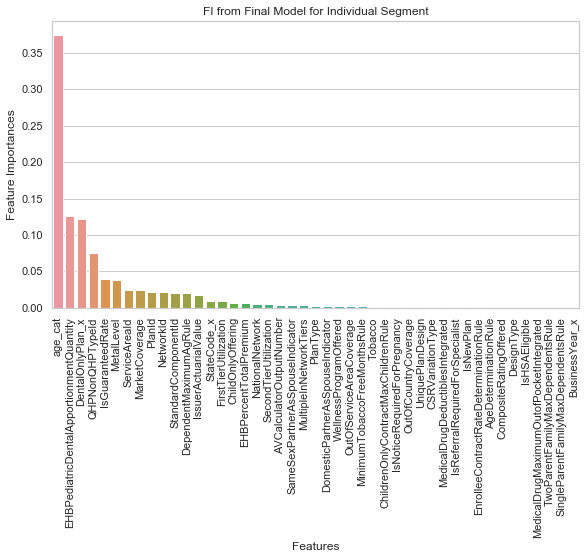

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
#sns.set_color_codes("Spectral")

#source_data = pd.DataFrame(source_counts).reset_index()
#flavor_data = pd.DataFrame(flavor_counts).reset_index()

plt.figure(2, figsize=(10,5))
#the_grid = GridSpec(2, 2)

#plt.subplot(the_grid[0, 1],  title='Source of Pies')
ax = sns.barplot(x=feature_importances.index,y=feature_importances['importance'])
#ax.set(xlabel='common xlabel', ylabel='common ylabel')
#plt.subplot(title='#Products Distribution in VIP Segment')

plt.xlabel("Features")
plt.ylabel("Feature Importances")
plt.title("FI from Final Model for Individual Segment")
plt.tight_layout()
plt.xticks(rotation='vertical')
# You can comment this line out if you don't need title
plt.show(ax)
#sns.barplot(x='Source',y='FoodCode', data=flavor_data, palette='Spectral')

#plt.suptitle('Pie Consumption Patterns in the United Stat

### Tree Random Forest dropped from Lasso

In [45]:
processed_dropped = processed[['IndividualRate','StandardComponentId', 'NetworkId', 'ServiceAreaId', 'PlanType', 'MetalLevel', 'DesignType', 'UniquePlanDesign', 'QHPNonQHPTypeId','IsReferralRequiredForSpecialist', 'CompositeRatingOffered', 'ChildOnlyOffering', 'WellnessProgramOffered', 'EHBPercentTotalPremium', 'EHBPediatricDentalApportionmentQuantity', 'OutOfServiceAreaCoverage', 'NationalNetwork', 'PlanId', 'CSRVariationType', 'MedicalDrugDeductiblesIntegrated', 'MedicalDrugMaximumOutofPocketIntegrated', 'FirstTierUtilization', 'SecondTierUtilization', 'StateCode_x', 'Tobacco', 'age_cat', 'TwoParentFamilyMaxDependentsRule', 'ChildrenOnlyContractMaxChildrenRule', 'MinimumTobaccoFreeMonthsRule', 'MarketCoverage']]

In [46]:
processed_dropped.shape

(96009, 30)

In [47]:
X = processed_dropped.drop(columns='IndividualRate')
y = processed_dropped[['IndividualRate']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [69]:
rfr = RandomForestRegressor(n_estimators = 250, random_state=0)               #RandomForestRegressor
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

/Users/dikshya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [70]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

10.171182802510964
8803.939534787221
93.82931063791965
0.9579861199352675


In [71]:
feature_importances = pd.DataFrame(rfr.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [72]:
feature_importances[:20]

,importance
age_cat,0.366883
EHBPediatricDentalApportionmentQuantity,0.262397
PlanId,0.072199
StandardComponentId,0.070185
NetworkId,0.051063
MetalLevel,0.044350
ServiceAreaId,0.040091
StateCode_x,0.020557
MarketCoverage,0.008980
QHPNonQHPTypeId,0.008597


In [73]:
feature_importances1 = feature_importances[:15]

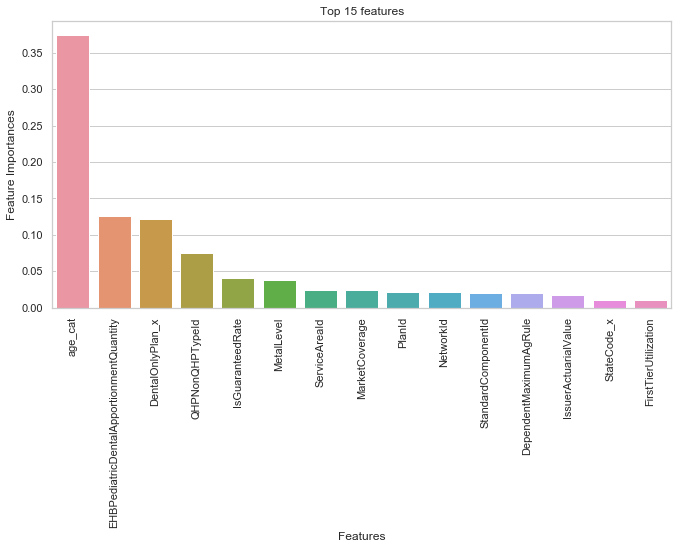

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
#sns.set_color_codes("Spectral")

#source_data = pd.DataFrame(source_counts).reset_index()
#flavor_data = pd.DataFrame(flavor_counts).reset_index()

plt.figure(2, figsize=(10,5))
#the_grid = GridSpec(2, 2)

#plt.subplot(the_grid[0, 1],  title='Source of Pies')
ax = sns.barplot(x=feature_importances1.index,y=feature_importances1['importance'])
#ax.set(xlabel='common xlabel', ylabel='common ylabel')
#plt.subplot(title='#Products Distribution in VIP Segment')

plt.xlabel("Features")
plt.ylabel("Feature Importances")
plt.title("Top 15 features")
plt.tight_layout()
plt.xticks(rotation='vertical')
# You can comment this line out if you don't need title
plt.show(ax)
#sns.barplot(x='Source',y='FoodCode', data=flavor_data, palette='Spectral')

#plt.suptitle('Pie Consumption Patterns in the United Stat

### Tree XGboost dropped from Lasso

In [31]:
processed_dropped = processed[['IndividualRate','StandardComponentId', 'NetworkId', 'ServiceAreaId', 'PlanType', 'MetalLevel', 'DesignType', 'UniquePlanDesign', 'QHPNonQHPTypeId','IsReferralRequiredForSpecialist', 'CompositeRatingOffered', 'ChildOnlyOffering', 'WellnessProgramOffered', 'EHBPercentTotalPremium', 'EHBPediatricDentalApportionmentQuantity', 'OutOfServiceAreaCoverage', 'NationalNetwork', 'PlanId', 'CSRVariationType', 'MedicalDrugDeductiblesIntegrated', 'MedicalDrugMaximumOutofPocketIntegrated', 'FirstTierUtilization', 'SecondTierUtilization', 'StateCode_x', 'Tobacco', 'age_cat', 'TwoParentFamilyMaxDependentsRule', 'ChildrenOnlyContractMaxChildrenRule', 'MinimumTobaccoFreeMonthsRule', 'MarketCoverage']]

In [34]:
from xgboost import XGBRegressor

In [32]:
X = processed_dropped.drop(columns='IndividualRate')
y = processed_dropped[['IndividualRate']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Dart

In [35]:
xgb = XGBRegressor(n_estimators=250, random_state=0,booster='dart')               #RandomForestRegressor
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

[12:17:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [36]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

65.91827941880301
32670.854152183565
180.7508067815565
0.8440891895567314


In [41]:
?XGBRegressor

### gbtree max_depth=50

In [93]:
xgb = XGBRegressor(n_estimators=250, random_state=0, max_depth=50)               #RandomForestRegressor
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

[22:02:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [94]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

2.7699282475647022
89.8358147513395
9.478175707979858
0.999571288383846


### gblinear

In [92]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

167.75818192810686
97398.96768588168
312.08807680826527
0.5351957461072805


### gbtree 

In [39]:
xgb = XGBRegressor(n_estimators=250, random_state=0)               #RandomForestRegressor
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

[12:22:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [40]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

65.91828045696742
32670.854003892407
180.75080637134764
0.8440891902644018


In [71]:
feature_importances = pd.DataFrame(rfr.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [72]:
feature_importances[:20]

,importance
age_cat,0.366883
EHBPediatricDentalApportionmentQuantity,0.262397
PlanId,0.072199
StandardComponentId,0.070185
NetworkId,0.051063
MetalLevel,0.044350
ServiceAreaId,0.040091
StateCode_x,0.020557
MarketCoverage,0.008980
QHPNonQHPTypeId,0.008597


In [73]:
feature_importances1 = feature_importances[:15]

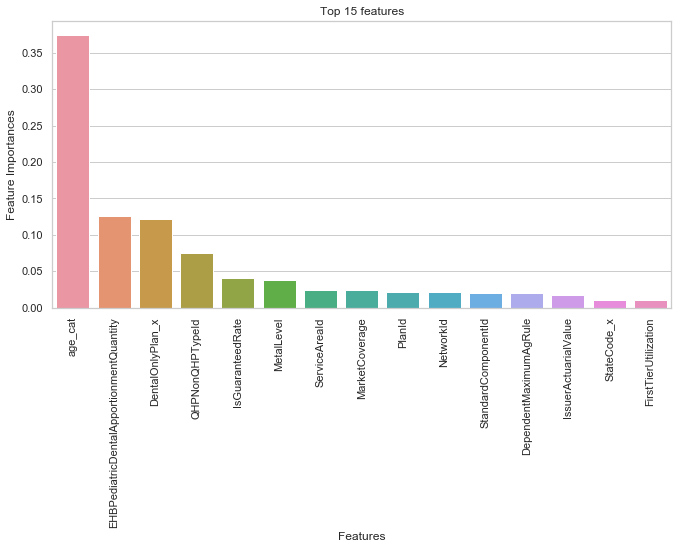

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
#sns.set_color_codes("Spectral")

#source_data = pd.DataFrame(source_counts).reset_index()
#flavor_data = pd.DataFrame(flavor_counts).reset_index()

plt.figure(2, figsize=(10,5))
#the_grid = GridSpec(2, 2)

#plt.subplot(the_grid[0, 1],  title='Source of Pies')
ax = sns.barplot(x=feature_importances1.index,y=feature_importances1['importance'])
#ax.set(xlabel='common xlabel', ylabel='common ylabel')
#plt.subplot(title='#Products Distribution in VIP Segment')

plt.xlabel("Features")
plt.ylabel("Feature Importances")
plt.title("Top 15 features")
plt.tight_layout()
plt.xticks(rotation='vertical')
# You can comment this line out if you don't need title
plt.show(ax)
#sns.barplot(x='Source',y='FoodCode', data=flavor_data, palette='Spectral')

#plt.suptitle('Pie Consumption Patterns in the United Stat

### Polynomial d=2

In [55]:
processed_dropped = processed[['IndividualRate','StandardComponentId', 'NetworkId', 'ServiceAreaId', 'PlanType', 'MetalLevel', 'DesignType', 'UniquePlanDesign', 'QHPNonQHPTypeId','IsReferralRequiredForSpecialist', 'CompositeRatingOffered', 'ChildOnlyOffering', 'WellnessProgramOffered', 'EHBPercentTotalPremium', 'EHBPediatricDentalApportionmentQuantity', 'OutOfServiceAreaCoverage', 'NationalNetwork', 'PlanId', 'CSRVariationType', 'MedicalDrugDeductiblesIntegrated', 'MedicalDrugMaximumOutofPocketIntegrated', 'FirstTierUtilization', 'SecondTierUtilization', 'StateCode_x', 'Tobacco', 'age_cat', 'TwoParentFamilyMaxDependentsRule', 'ChildrenOnlyContractMaxChildrenRule', 'MinimumTobaccoFreeMonthsRule', 'MarketCoverage']]

In [56]:
X = processed_dropped.drop(columns='IndividualRate')
y = processed_dropped[['IndividualRate']]


In [57]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(X)
xp.shape

(96009, 4960)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(xp, y, test_size=0.20, random_state=42)

In [59]:
summ=OLS(y_train,X_train).fit()

In [1]:
#summ.summary()

In [61]:
y_pred = summ.predict(X_test)


print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

74.12097685694972
33459.4338828205
182.9192004214443
0.840325954462539


In [11]:
rfr = RandomForestRegressor(random_state=0)               #RandomForestRegressor
rfr.fit(X_train,y_train)
y_pred = summ=OLS(y_train,X_train).fit()

summ.summary().predict(X_test)

/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [12]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

8.75890922644952
2081.395262746139
45.62231101934819
0.9900672317670078


In [16]:
feature_importances = pd.DataFrame(rfr.feature_importances_,
                                   index = polynomial_features.get_feature_names(),
                                    columns=['importance']).sort_values('importance',ascending=False)
#polynomial_features.get_feature_names()

In [18]:
feature_importances = feature_importances[:15]

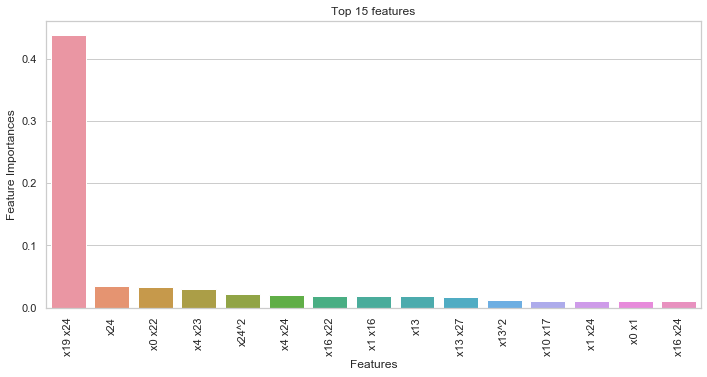

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
#sns.set_color_codes("Spectral")

#source_data = pd.DataFrame(source_counts).reset_index()
#flavor_data = pd.DataFrame(flavor_counts).reset_index()

plt.figure(2, figsize=(10,5))
#the_grid = GridSpec(2, 2)

#plt.subplot(the_grid[0, 1],  title='Source of Pies')
ax = sns.barplot(x=feature_importances.index,y=feature_importances['importance'])
#ax.set(xlabel='common xlabel', ylabel='common ylabel')
#plt.subplot(title='#Products Distribution in VIP Segment')

plt.xlabel("Features")
plt.ylabel("Feature Importances")
plt.title("Top 15 features")
plt.tight_layout()
plt.xticks(rotation='vertical')
# You can comment this line out if you don't need title
plt.show(ax)
#sns.barplot(x='Source',y='FoodCode', data=flavor_data, palette='Spectral')

#plt.suptitle('Pie Consumption Patterns in the United Stat

### Polynomial d=3

In [22]:
processed_dropped = processed[['IndividualRate','StandardComponentId', 'NetworkId', 'ServiceAreaId', 'PlanType', 'MetalLevel', 'DesignType', 'UniquePlanDesign', 'QHPNonQHPTypeId','IsReferralRequiredForSpecialist', 'CompositeRatingOffered', 'ChildOnlyOffering', 'WellnessProgramOffered', 'EHBPercentTotalPremium', 'EHBPediatricDentalApportionmentQuantity', 'OutOfServiceAreaCoverage', 'NationalNetwork', 'PlanId', 'CSRVariationType', 'MedicalDrugDeductiblesIntegrated', 'MedicalDrugMaximumOutofPocketIntegrated', 'FirstTierUtilization', 'SecondTierUtilization', 'StateCode_x', 'Tobacco', 'age_cat', 'TwoParentFamilyMaxDependentsRule', 'ChildrenOnlyContractMaxChildrenRule', 'MinimumTobaccoFreeMonthsRule', 'MarketCoverage']]

In [23]:
X = processed_dropped.drop(columns='IndividualRate')
y = processed_dropped[['IndividualRate']]


In [25]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(X)
xp.shape

(96009, 4960)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(xp, y, test_size=0.20, random_state=42)

In [27]:
rfr = RandomForestRegressor(random_state=0)               #RandomForestRegressor
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

/Users/dikshya/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dikshya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [28]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

8.835072459751922
2022.7383598497693
44.9748636445934
0.9903471523722686


In [42]:
feature_importances = pd.DataFrame(rfr.feature_importances_,
                                   index = polynomial_features.get_feature_names(),
                                    columns=['importance']).sort_values('importance',ascending=False)
#polynomial_features.get_feature_names()

In [43]:
feature_importances = feature_importances[:15]

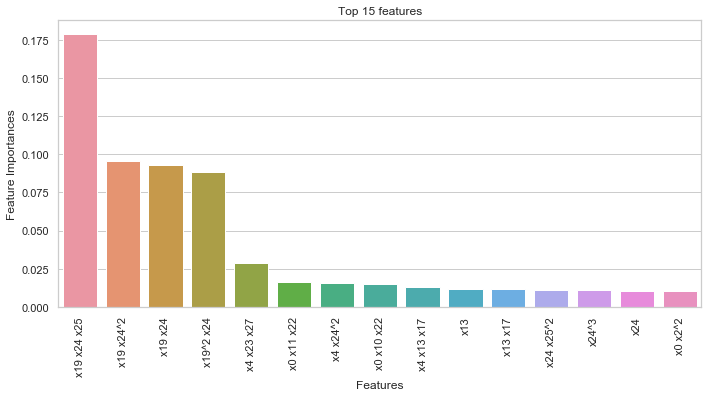

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
#sns.set_color_codes("Spectral")

#source_data = pd.DataFrame(source_counts).reset_index()
#flavor_data = pd.DataFrame(flavor_counts).reset_index()

plt.figure(2, figsize=(10,5))
#the_grid = GridSpec(2, 2)

#plt.subplot(the_grid[0, 1],  title='Source of Pies')
ax = sns.barplot(x=feature_importances.index,y=feature_importances['importance'])
#ax.set(xlabel='common xlabel', ylabel='common ylabel')
#plt.subplot(title='#Products Distribution in VIP Segment')

plt.xlabel("Features")
plt.ylabel("Feature Importances")
plt.title("Top 15 features")
plt.tight_layout()
plt.xticks(rotation='vertical')
# You can comment this line out if you don't need title
plt.show(ax)
#sns.barplot(x='Source',y='FoodCode', data=flavor_data, palette='Spectral')

#plt.suptitle('Pie Consumption Patterns in the United Stat